# Project: No-show appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction: No- show for medical appointments

> In this analysis, the patients showing up and not showing up for their medical appointments at hospitals in Brazil is considered.

> The dataset selected for analysis is "No-show appointments". In this analysis, the factors that help in predicting if the patients will show up or not to their appointments will be analyzed. In the given dataset, the medical appointment details of patients in Brazil is described. The data related to patient and his/her appointment are given. 

> Patient data included are: <br>'PatientId'	- medical ID of the patient <br>'AppointmentID' - appointment number provided to patient by hospital<br>'Gender' - sex of the patient either Male or Female <br>'ScheduledDay' - the date on which the patient requested the hospital to allot an appointment <br>'AppointmentDay' - date on which the patient will be showing up at the hospital for medical check up <br>'Age' - age of the patient, 'Neighbourhood' - location of the hospital where the medical check up is going to be taken place <br>'Scholarship' - describes if the patient is enrolled in the Brasilian Welfare Program Bolsa Familia, 'Hipertension' - describes if the patient has hypertension <br>'Diabetes' - describes if patient is diabetic <br>'Alcoholism' - indicates if patient is alcoholic <br>'Handcap' - indicates if patient is handicap <br> 'SMS_received' - describes if patient got an appointment confirmation/reminder SMS from hospital<br> 'No-show' indicates that the patient didnot show up for appointment if value equal to 1 and patient showed up for appointment if value is 0.

In [1]:
# import the library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

Questions that will be explored:

Analysis: What are the factors that will helping in predicting if the patient will show up to the appointment or not? Does showing   up to the appointment depend on certain characteristics of the patient or is it completely not related to the patient  characteistics?
So, 'No-show' is the dependent variable. 'Scheduled Day' and 'AppointmentDay', 'Age', 'Gender' and 'Scholarship' are the independent variables

> 1) Does age of the patient help in predicting if the patient will show up?

> 2) Does Gender of the patient help in predicting if the patient will show up?

> 3) Does having same day in 'Scheduled Day' and 'AppointmentDay' help in predicting if the patient will show up?

> 4) Does scholarship help in predicting if the patient will show up?

> 5) Does patient's health and medical conditions help in predicting if the patient will show up?

> 6) Does hospital location and/or SMS_received help in predicting if the patient will show up?

<a id='wrangling'></a>
## Data Wrangling


### General Properties
> Loading dataset and analyse it

In [2]:
# Load dataset and print first few lines

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(8)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes


In [3]:
#lets determine the row and column count of the dataset
df.shape

(110527, 14)

Lets look into the data and its characteristics: <br>
Inspect the range and columns in the dataset and its datatypes. Check for any missing data.

In [4]:
# Inspect data types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset has 14 columns and 110527 rows. According to the previous info() result, there are no missing values in any columns. We also see that there are 3 datatypes in this dataset: float, integer and string.

Lets visualize each column data using histogram

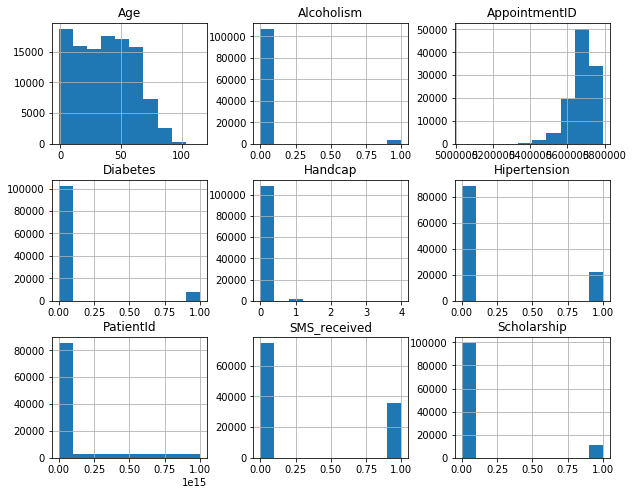

In [5]:
df.hist(figsize =(10,8));

The histogram graph for 'Age' shows that patients age ranges from 0 i.e., just born baby to an age of around 100. We also see that medical appointment for patients with age around 0 and 40 are high.Also the appointments for patients after age of 50 is skewed.

The histogram graph for 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap' shows that larger group of patients have lower percentage of medical/health conditions. And lesser patients have critical health/medical conditions.

The histogram graph for 'SMS_received' shows that around two-thirds of patient's did not get SMS and one-third of patients got SMS for their appointment.

The histogram graph for 'scholarship' shows that major count of patients have not registered in Welfare Program 'Bolsa Familia' and very few patients have registered in the Welfare program.

Lets check the average, minimum, maximum and other related aspects of the dataset with respect to columns 

In [6]:
# Perform operations to inspect data types and look for instances of missing or possibly errant data.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


It is seen that the average age of the patients in the dataset is 37. Also, the minimum age seen is -1 or 0 i., just born babies and highest age seen is 115.. 
Very less number of patients seem to have scholarship i.e., around 9.8%.The average level of health/medical conditions like Hypertension, Diabetes, Alcoholism and Handicap percentage seems to be around 19.7%, 7%, 3% and 2%. On an average, 32% of people received SMS reminder for their appointment.

Now lets consider each of the 14 columns in dataset and see if it is required for analyzing if the patient will show up or not. Column 'PatientId' doesn't give much information about the patient, so it is not relevant in predicting if the patient will show up to the appointment. Similarly, column 'AppointmentID' data does not relate to patient and his decision in showing up for the appointment. Hence, it is not relevant for our analysis. 

Columns 'Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism',	'Handcap' gives us information about patient and his/her health. So, this is very relevant to our analysis. Columns 'ScheduledDay' and 'AppointmentDay' gives us idea about what day did the patient schedule the appointment and for when. This will be helpful in predicting if the patient will show up for the appointment based on the criteria if it was a preplanned schedule or a emergency/last minute appointment.

Columns 'Neighbourhood' and 'SMS_received' does not seem to be very relevant since it does not give patient detail. But, its impact on the patient is not known; for instance: if the patient had got this appointment scheduled long ago and had eventually forgotten about it, then receiving the SMS would have helped to remember the appointment and go for it. Simialarly, if the hospital location is not at a convenient place, then it would discourage the patient from showing up unless its an emargency. These 2 column's affect on our analysis is not clear as of now.

### Data Cleaning to retain only the relevant data

Let us now clean the dataset by removing the columns: 'PatientId' and 'AppointmentID' since it is not relevant to the analysis.

In [7]:
# drop the 2 columns: 'PatientId' and 'AppointmentID'
df = df.drop(columns= ['PatientId','AppointmentID'])
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [8]:
df.shape

(110527, 12)

Now the dataset has 12 columns since the 'PatientId' and 'AppointmentID' columns have been dropped.

<a id='eda'></a>
## Exploratory Data Analysis

### 1) Does age of the patient help in predicting if the patient will show up?

> Let's inspect if 'Age' is a factor based on which the patients get biased to show up for their appointment

In [9]:
#create masks to group patients as ones who showed up for the appointment and the ones who did not
showed = df['No-show'] == 'No'
noshow = df['No-show'] == 'Yes'

In [10]:
# determine the mean of age of the patients who showed up for the appointment
df.Age[showed].mean()

37.790064393252315

In [11]:
# determine the mean of age of the patients who did not show up for the appointment
df.Age[noshow].mean()

34.31766656212196

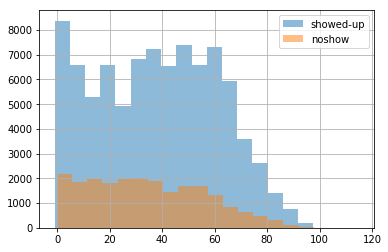

In [12]:
#plot the Age distribution
df.Age[showed].hist(alpha = 0.5,bins = 20, label = 'showed-up')
df.Age[noshow].hist(alpha = 0.5,bins = 20, label = 'noshow')
plt.legend();

The mean age of the patients who showed up is around 38 and mean age of patients who didn't showed up is around 34. Also, the histogram shows that there is similar pattern of showing up and no-show for appointments. This doesn't give much information in predicting if the patient will show up for the  appointment. So, patient's age is not an attribute to be considered for our analysis.

### 2) Does Gender of the patient help in predicting if the patient will show up?


> Let's inspect if 'Gender' is a factor based on which the patients get biased to show up for their appointment 

In [13]:
#determine the number of male patients
df_altered = df
male_count = sum(df_altered['Gender']=='M')
male_count

38687

In [14]:
#determine the number of female patients
female_count = sum(df_altered['Gender']=='F')
female_count

71840

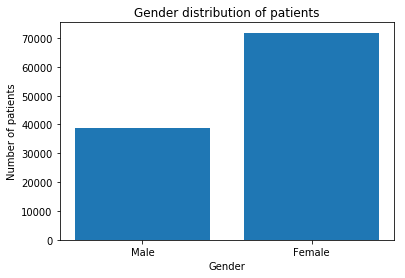

In [15]:
# plot the gender count in bar chart
plt.bar(['Male','Female'],[male_count,female_count])
plt.title('Gender distribution of patients')
plt.xlabel('Gender')
plt.ylabel('Number of patients');

The count of male patients is 38687 and female patients is 71840. From the Bar graph, it is seen the same, ie., count of female patients is around double of male patients.

In [16]:
# convert 'No' and 'Yes' in 'No-show' column to 0 and 1 to make it easier for further analysis 
df_altered = df
df_altered['No-show'] = df['No-show'].apply(lambda x : 1 if x == 'No' else 0)
df_altered

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,1
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,0
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,0
8,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,1
9,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,1


In [17]:
# determine the mean of Gender of the patients who showed up for the appointment
df_altered.groupby('Gender')['No-show'].mean()

Gender
F    0.796854
M    0.800321
Name: No-show, dtype: float64

The patients of Gender 'Female' showed up on an average of around 79.7% and patients of Gender 'Male' showed up on an average of around 80%. Also, the histogram shows that there is similar pattern of showing up and no-show for appointments. In both genders, higher percentage of people showed and some small percentage of patients didn't show up. This doesn't give much information in predicting if the patient will show up for the  appointment. So, patient's Gender is not an attribute to be considered for our analysis.


### 3) Does having same day in 'ScheduledDay' and 'AppointmentDay' help in predicting if the patient will show up?


> Let's inspect if the scheduled day and appointment day are same, then can it be considered as a factor based on which the patients will show up for their appointment 

In [18]:
# Split the 'ScheduledDay' and 'AppointmentDay' value to contain only the date and no time details.
df_altered['ScheduledDay'] = df['ScheduledDay'].apply(lambda x : x[0: 10])
df_altered['AppointmentDay'] = df['AppointmentDay'].apply(lambda x : x[0: 10])
df_altered.head(8)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,1
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,0
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,0


> Create 2 datasets: dataset 'df_match' with 'ScheduledDay' and 'AppointmentDay' column having same value i.e., the patient scheduled the appointment for the same day and dataset 'df_mismatch' with 'ScheduledDay' and 'AppointmentDay' column having different value i.e., the patient scheduled the appointment for a future date. Then determine the mean of 'No-show' by each each dataset. Inspect if that helps in predicting the analysis.

In [19]:
# Compare the values of 'ScheduledDay' and 'AppointmentDay' column for each patient and inspect the 'No-show' value 
# when both days are same vs when both days are different
df_match = df_altered[df_altered['ScheduledDay'] == df_altered['AppointmentDay']]
df_mismatch = df_altered[df_altered['ScheduledDay'] != df_altered['AppointmentDay']]
df_match.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [20]:
df_match.shape

(38563, 12)

So, there are 38563 patients who scheduled the appointment for the same. Next, lets determine what percentage of these patients showed up for appointment and what percentage didn't

In [21]:
# Determine the number of patients who showed up for appointment
sum(df_match['No-show']==1)

36771

In [22]:
# Determine the number of patients who didn't show up for appointment
sum(df_match['No-show']==0)

1792

It is seen that there are 36771 patients who showed up for appointment after scheduling it on the same day and 1792 patients didn't show up. So when the appointment was scheduled on the same day, percentage of patients showed up for the appointment is 95.4% and percentage of patients showed up for the appointment is 4.6%

Now analyze the percentage of patients showing up and not showing for appointment when it was scheduled for a future date.

In [23]:
df_mismatch.shape

(71964, 12)

So, there are 71964 patients who scheduled the appointment for a future date. Next, lets determine what percentage of these patients showed up for appointment and what percentage didn't

In [24]:
# Determine the number of patients who showed up for appointment
sum(df_mismatch['No-show']==1)

51437

In [25]:
# Determine the number of patients who didn't show up for appointment
sum(df_mismatch['No-show']==0)

20527

It is seen that there are 51437 patients who showed up for appointment after scheduling it on the different day and 20527 patients didn't show up. So when the appointment was scheduled on a different day, percentage of patients showed up for the appointment is 71.5% and percentage of patients showed up for the appointment is 28.5%

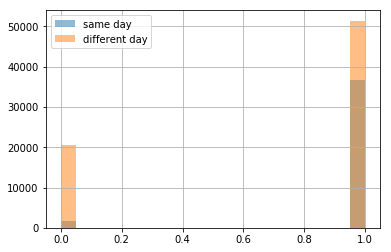

In [26]:
#plot the appointment distribution
df_match['No-show'].hist(alpha = 0.5,bins = 20, label = 'same day')
df_mismatch['No-show'].hist(alpha = 0.5,bins = 20, label = 'different day')
plt.legend();

It is clearly seen that the number of appointments scheduled for a future date is higher than the same day appointment schedule. Also, when the appointment was scheduled on the same day the probability of patient showing up is high i.e., around 95% and percentage of patients showing up when the appointment was scheduled for a future date is 71%. This shows that based on the scheduling date for appointment, we can predict if the possiblilty of patient showing up is high or low i.e., when a patient schedules an appointment for the same day, then the probability of showing up is very high and when a patient schedules an appointment for a future date, then probability of showing up is comapritively lower.

### 4) Does scholarship help in predicting if the patient will show up?


> Let's inspect if having been registered to the Brasilian welfare program data can be considered as a factor based on which the patients will show up for their appointment 

In [27]:
# Determine the possible values for 'Scholarship' column 
df_altered['Scholarship'].unique()

array([0, 1], dtype=int64)

In [28]:
# determine the number of patients who have Scholarship
df_scholarship = df_altered.query('Scholarship == 1')
df_scholarship.shape

(10861, 12)

In [29]:
# determine the number of patients who donot have Scholarship
df_noscholarship = df_altered.query('Scholarship == 0')
df_noscholarship.shape

(99666, 12)

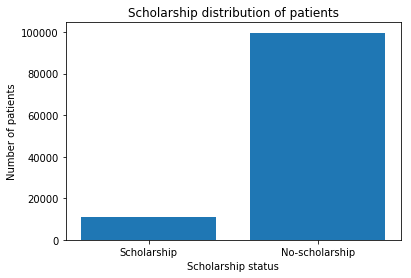

In [30]:
# plot the count of patients who had scholarship in bar chart
plt.bar(['Scholarship','No-scholarship'],[len(df_scholarship),len(df_noscholarship)])
plt.title('Scholarship distribution of patients')
plt.xlabel('Scholarship status')
plt.ylabel('Number of patients');

It is seen that out of 110527 patients, only 10861 patients have scholarship and 99666 dont have scholarship 
i.e., very less patients had scholarship.

In [31]:
# Determine the number of patients who had Scholarship and showed up for appointment
sum(df_scholarship['No-show']==1)

8283

In [32]:
# Determine the number of patients who have Scholarship and did not show up for appointment
sum(df_scholarship['No-show']==0)

2578

It is seen that out of 10861 patients who have scholarship, 8283 patients showed up for appointment and 2578 patients didnot show up. So, aorund 76% of patients who had scholarship showed up and around 24% of patients who had scholarship did not show up 

In [33]:
# Determine the number of patients who did not Scholarship and showed up for appointment
sum(df_noscholarship['No-show']==1)

79925

In [34]:
# Determine the number of patients who didn't have Scholarship and did not show up for appointment
sum(df_noscholarship['No-show']==0)

19741

It is seen that out of 99666 patients who did not have scholarship, 79925 patients showed up for appointment and 19741 patients didnot show up. So, aorund 80% of patients who did not have scholarship showed up and around 20% of patients who didnot have scholarship did not show up.

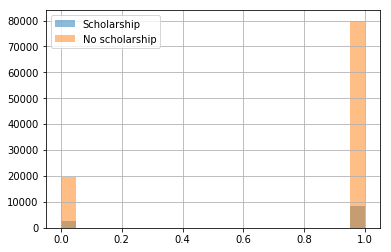

In [35]:
#plot the Scholarship distribution and Patient's showing up status
df_scholarship['No-show'].hist(alpha = 0.5,bins = 20, label = 'Scholarship')
df_noscholarship['No-show'].hist(alpha = 0.5,bins = 20, label = 'No scholarship')
plt.legend();

The histogram shows that the cases with Scholarship is lower and patient count without Scholarship are high. In both cases, percentage of patients who showed up for appointments is greater than 75%. So, this does not help in predicting if the patient will show up for appointment based on having registered for Scholarship.

### 5) Does patient's health and medical conditions help in predicting if the patient will show up?

> Let's inspect if patient's health and medical conditions like hypertension, diabetes, handicap and alcoholism data can be considered as a factor based on which the patients will show up for their appointment 

In [36]:
# Lets consider patients having hypertension and inspect their pattern in shoowing for appointments
# determine the mean of hypertension of the patients who showed up for the appointment
df_altered.groupby('Hipertension')['No-show'].mean()

Hipertension
0    0.790963
1    0.826980
Name: No-show, dtype: float64

It is seen that on an average 79% of patients who didnot have hypertension showed up and 82% of patients who had hypertension showed up. The percentage of patients who showed with and without hypertension is around the same. So, hypertension variable does not help in predicting if the patient will show up for appointment or not.

In [37]:
# Lets consider patients having diabetes and inspect their pattern in shoowing for appointments
# determine the mean of diabetes of the patients who showed up for the appointment
df_altered.groupby('Diabetes')['No-show'].mean()

Diabetes
0    0.796372
1    0.819967
Name: No-show, dtype: float64

It is seen that on an average 80% of patients who didnot have diabetes showed up and 82% of patients who had diabetes showed up. The percentage of patients who showed with and without diabetes is around the same. So, diabetes variable does not help in predicting if the patient will show up for appointment or not.

In [38]:
# Lets consider patients having alcoholism and inspect their pattern in shoowing for appointments
# determine the mean of Alcoholism of the patients who showed up for the appointment
df_altered.groupby('Alcoholism')['No-show'].mean()

Alcoholism
0    0.798054
1    0.798512
Name: No-show, dtype: float64

It is seen that on an average 80% of patients who were not alcoholic showed up and 80% of patients who were alcoholic showed up. The percentage of patients who showed with and without being alcoholic is around the same. So, alcoholism variable does not help in predicting if the patient will show up for appointment or not.

In [39]:
# Lets consider patients being Handcap and inspect their pattern in shoowing for appointments
# Detremine the possible values for 'Handcap' column
df_altered['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

Its seen that there are 4 types of Handicap conditions recognized in the patients: 1,2,3,4 and with 0 being no handicap condition.

In [40]:
# determine the mean of Handcap of the patients who showed up for the appointment
df_altered.groupby('Handcap')['No-show'].mean()

Handcap
0    0.797647
1    0.820764
2    0.797814
3    0.769231
4    0.666667
Name: No-show, dtype: float64

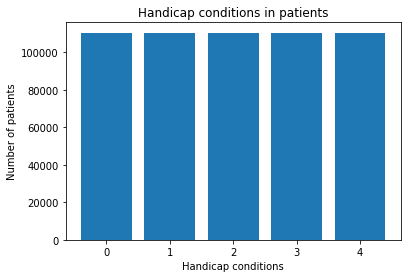

In [41]:
# plot the handicap conditions of patients in bar chart
plt.bar([0,1,2,3,4],[len(df_altered['Handcap']==0),len(df_altered['Handcap']==1),len(df_altered['Handcap']==2),len(df_altered['Handcap']==3),len(df_altered['Handcap']==4)])
plt.title('Handicap conditions in patients')
plt.xlabel('Handicap conditions')
plt.ylabel('Number of patients');

It is seen that there are 4 handicap conditions: 1,2,3,4 and these patients with the handicap conditions showed on an average of 82%, 80%, 77% and 67% and percentage of patients who were not handicap and showed up is 80%. The percentage of patients who showed with and without being handicap is around the same. So, 'Handcap' variable does not help in predicting if the patient will show up for appointment or not.

### 6) Does hospital location and similary receiving SMS help in predicting if the patient will show up?

In [42]:
# Lets consider patients who SMS and inspect their pattern in showing for appointments
# determine the mean of SMS_received of the patients who showed up for the appointment
df_altered.groupby('SMS_received')['No-show'].mean()

SMS_received
0    0.832967
1    0.724255
Name: No-show, dtype: float64

It is seen that on an average 83% of patients who did not receive SMS showed up and 72% of patients who received SMS showed up. The percentage of patients who showed with and without receiving SMS is not ideal, since the percentage of patients who didnot show up even after receiving SMS is high. So, 'SMS_received' variable does not help in predicting if the patient will show up for appointment or not.

In [43]:
# Lets inspect the hospital location and if it creates a pattern in patients showing for appointments
# determine the mean of Neighbourhood of the patients who showed up for the appointment
df_altered.groupby('Neighbourhood')['No-show'].mean()

Neighbourhood
AEROPORTO              0.875000
ANDORINHAS             0.769673
ANTÔNIO HONÓRIO        0.815498
ARIOVALDO FAVALESSA    0.780142
BARRO VERMELHO         0.784870
BELA VISTA             0.798637
BENTO FERREIRA         0.775058
BOA VISTA              0.814103
BONFIM                 0.801659
CARATOÍRA              0.769591
CENTRO                 0.789142
COMDUSA                0.819355
CONQUISTA              0.811543
CONSOLAÇÃO             0.827762
CRUZAMENTO             0.782546
DA PENHA               0.806495
DE LOURDES             0.845902
DO CABRAL              0.842857
DO MOSCOSO             0.777240
DO QUADRO              0.835100
ENSEADA DO SUÁ         0.778723
ESTRELINHA             0.802974
FONTE GRANDE           0.781525
FORTE SÃO JOÃO         0.816834
FRADINHOS              0.813953
GOIABEIRAS             0.804286
GRANDE VITÓRIA         0.797386
GURIGICA               0.774034
HORTO                  0.760000
ILHA DAS CAIEIRAS      0.780579
                         .

In [44]:
max(df_altered.groupby('Neighbourhood')['No-show'].mean())

1.0

There are 81 hospital locations and the mean percentage of patients showing up vary mostly around 70% to 85%, with expection of 100% at PARQUE INDUSTRIAL. However, this does not help in predicting if patient will show up for the appointment.

<a id='conclusions'></a>
## Conclusions

<b>Results</b>: This Data analysis suggests   
<br>1) Based on the analysis, it is seen that the variable that is most helpful in predicting if the probability of patient  showing up for the appointment as high or low is when 'ScheduledDay' and 'AppointmentDay' are same date. 
<br>2) 'Age' based data show that patient's age range over a wide range i.e., almost a lifetime of patients and does not help much in predicting if the patient will show up or not since the mean percentage of patient showing up and not showing up does not vary much.
<br>3) 'Gender' based data also shows a mean percentage for patient showing up and not showing up for appointment which does not vary much from each other. So predicting the probability if the patient will show up or not based on 'Gender' is not possible.
<br>4) 'Scholarship' data indicates that being registered in Brasilian Family Welfare program or not registered does not affect the patient's probability of showing up for the appointment.
<br>5) 'Hipertension',	'Diabetes',	'Alcoholism', 'Handcap' and 'SMS_received' data shows a mean percentage for patient showing up and not showing up for appointment which does not vary much from each other. So, it is not very helpful in predicting the probability if the patient will show up or not since the percentage difference is not greater than 10%
<br>6) Variable 'PatientId'and 'AppointmentID' is not relevant to patient in showing up for appointment.
<br>7) These conclusions are drawn based on the average of the values seen in dataset and its values are tentative. 

<b>Limitations</b>: A couple of limitation seen in the data analysis 
<br>1) Since the variables are mostly categories with 0 or 1 values, detail oriented analysis was not possible.
<br>2) Correlation between variables was not possible since deep dive of variables with respect to 'no-show' probability was hard.

In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'NoShow_Appointment.ipynb'])

0